<a href="https://colab.research.google.com/github/Brycexxx/fastai/blob/master/lesson3_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

### Preparing the data

In [0]:
path = untar_data(URLs.IMDB_SAMPLE)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [5]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [7]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [11]:
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv'),
 PosixPath('/root/.fastai/data/imdb_sample/tmp')]

In [0]:
data = TextDataBunch.load(path)

### Tokenization

In [0]:
data = TextClasDataBunch.load(path)

In [15]:
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive


In [26]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [23]:
data.train_ds[0][0]

Text xxbos xxmaj the plot of this movie hangs on one important point : that this murderer was also a responsible , loving , caring father . xxmaj not that being a father and a murderer is impossible . xxmaj but this man is shown murdering a teenage girl without xxunk or reason and without emotion . xxmaj this girl was someone 's daughter . i do n't think a father who cared so much about his own daughter could have been so cold - blooded to someone else 's daughter . xxmaj or , alternately , could have been so cold blooded and yet worry about and care for his own daughter . xxmaj and the idea that a convicted murderer would actually ask his victim 's parents to take in and care for his daughter is beyond belief . 
 
  xxmaj that said , the characters were acted with conviction by the actors . i thought changing xxmaj scott xxmaj xxunk 's eye color did make him seem more cold and menacing than he usually is . xxmaj you could n't see into his eyes at all .

In [25]:
data.train_ds[0][0].data[:10]

array([   2,    4,    8,  130,   13,   20,   28, 4718,   35,   43])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

### Language model

In [0]:
bs = 48

In [30]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/unsup')]

In [31]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [0]:
data_lm = (TextList.from_folder(path)
                   .filter_by_folder(include=['train', 'test', 'unsup'])
                   .random_split_by_pct(0.1)
                   .label_for_lm()
                   .databunch(bs=bs))

In [0]:
data_lm.save('tmp_lm')

In [0]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [36]:
data_lm.show_batch()

idx,text
0,", and almost completely devoid of dramatization . xxmaj the couple lives an almost routine life and the user who complains about xxmaj june xxmaj allyson 's choice for the wife , xxup imho , totally misses the point . xxmaj with her less - than - attractive look , her hoarse voice , she was the perfect housewife the screenplay needed . xxmaj at the time , women were"
1,""" and i say this lightly , is nothing but pure trash . i feel sorry for those people that actually wasted their money to go see this in theaters .. i saw a screener of the movie from a friend and i 've regretted it ever since . \n \n xxmaj as a black woman , i am xxup extremely embarrassed to have seen this . xxmaj more"
2,"xxup stay away from xxup benji ... he 's a dog and this movie is a dog ! xxbos i still wonder why i sat through this entire thing . xxmaj it only had about 3 minutes of actual entertainment , the rest of it was just a total bore . xxmaj the acting is n't that great and the action scenes are s xxrep 4 o cheesy it 's"
3,utter nonsense . i bet the director was either mega - stoned when he made this or he was just taking the pee out of every xxmaj david xxmaj bradley fan who would sit through this heap of crap . xxmaj the plot circles around a doctor ( xxmaj bradley ) who develops some type of xxmaj virtual xxmaj reality game in which he 's just killing different people off
4,"plot defies logic and belief . xxmaj you have got to hear the part about why the wife did what she did in order "" to save her husband "" . xxmaj yeah , right . i guarantee that you would walk out of the theatre thinking , "" hmm , now that does n't make sense at all . "" xxmaj this is one movie in which you really"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.98E-04


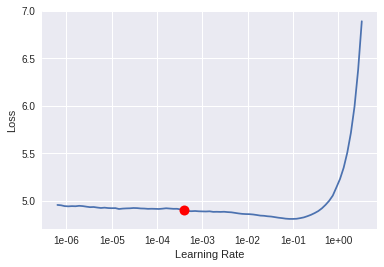

In [41]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,4.883031,4.735030,0.253043


In [0]:
learn.save('fit_head')

In [44]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos xxmaj an anonymous film which could have been directed by anyone at all . xxmaj where is xxmaj anthony xxmaj mann , the director of such classics as " xxmaj el xxmaj cid " " the naked spur " or " the man from xxmaj laramie " ? 
 
  xxmaj there are marvelous shots of planes in the clouds , lovingly filmed . xxmaj the story is very trite , and almost completely devoid of dramatization . xxmaj the couple lives an almost routine life and the user who complains about xxmaj june xxmaj allyson 's choice for the wife , xxup imho , totally misses the point . xxmaj with her less - than - attractive look , her hoarse voice , she was the perfect housewife the screenplay needed . xxmaj at the time , women were barefoot and pregnant : there 's not one single woman among the base staff , even in the desk jobs xxunk they had to do was worrying about their hubbies , who were fighting for democracy and against an x

In [0]:
learn.unfreeze()

In [46]:
learn.fit_one_cycle(13, 1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy


KeyboardInterrupt: ignored

#### 训练时间太长无法进行。。。。。。。。。